感知器 <br>
仿人类的神经单元，其函数为activation=1 or 0，即输出结果为1或0。以实现类似的逻辑（是、否、二者交集、二者并集、非）判断。

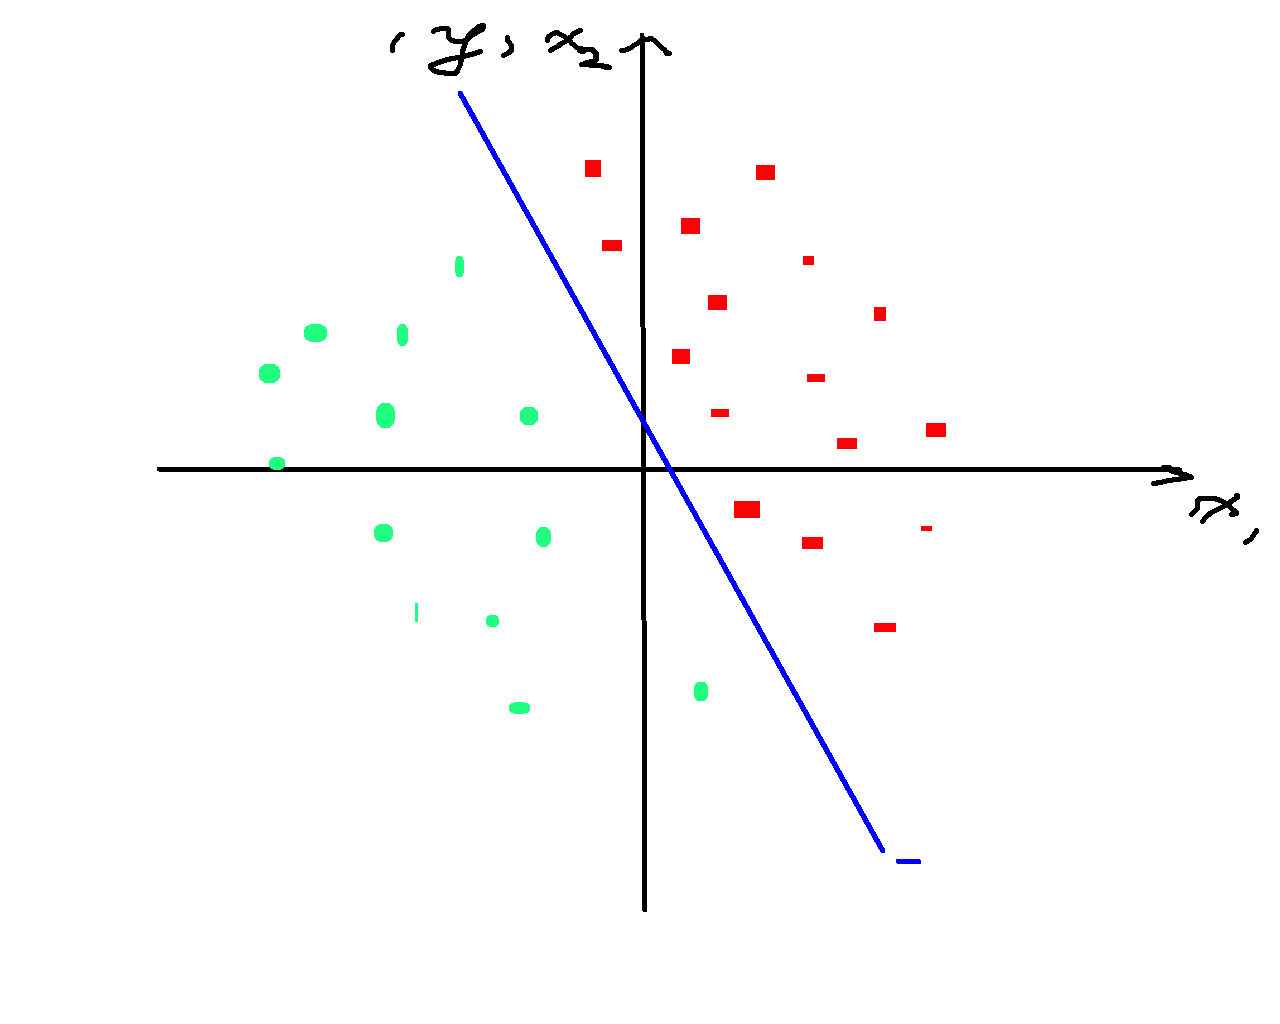

In [2]:

from IPython.display import Image
Image(filename='1.1.Linearly_Separable.png')

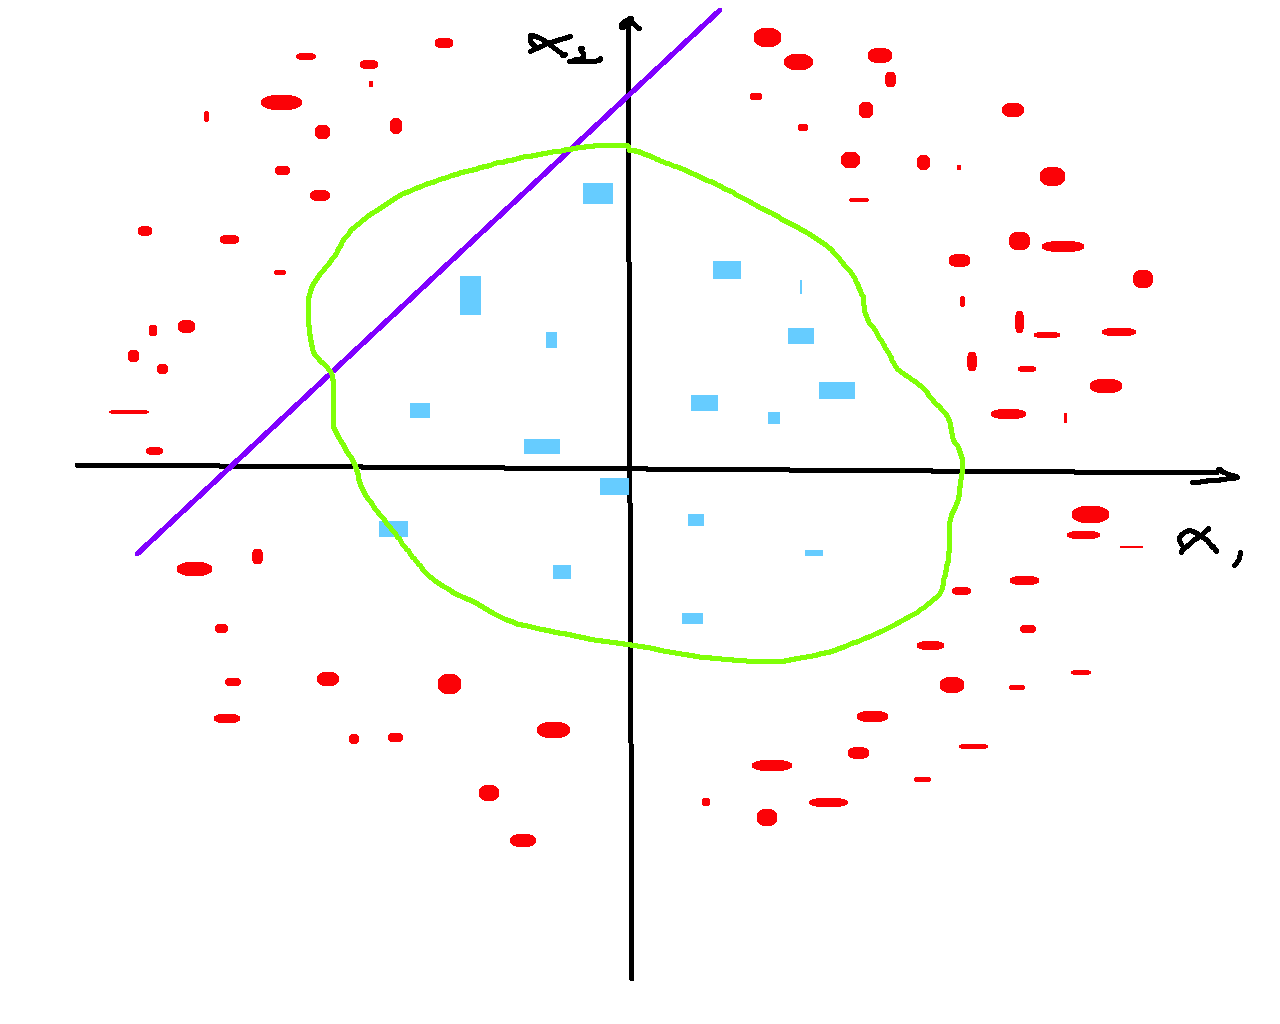

In [3]:

from IPython.display import Image
Image(filename='1.2.Linearly_unseparable.png')


我们可以在拿到数据后进行基本的判断，然后确定是否使用感知器方法解决（必须是可以Linearly_Separable）


建模思想就是IO与Para优化（调参）

In [4]:
from IPython.display import Image
Image(filename='1.3.IOandPara.png')

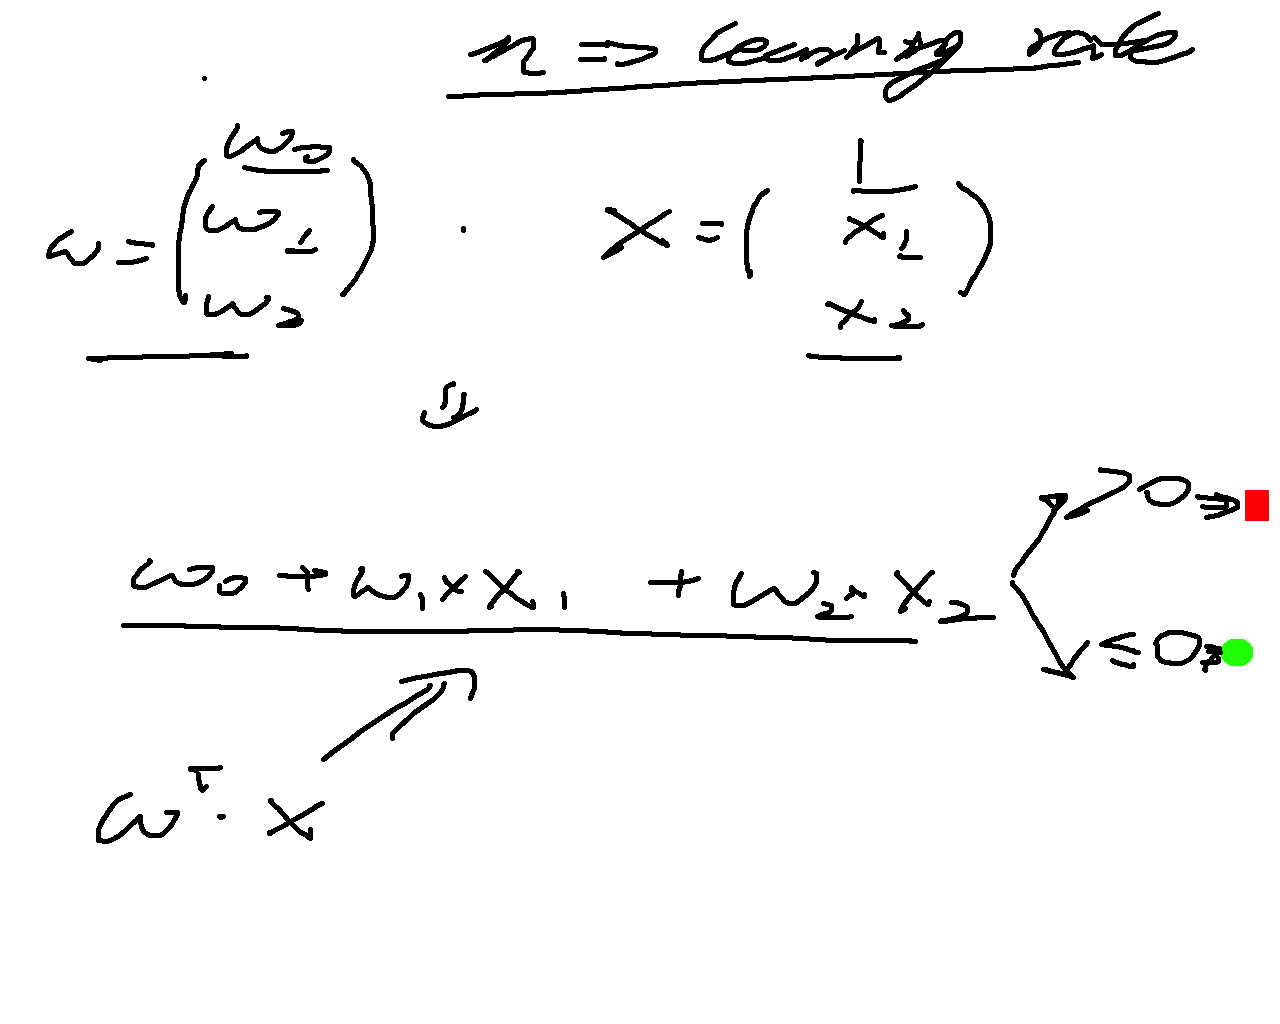

In [5]:
from IPython.display import Image
Image(filename='1.4.somemath.png')



通过矩阵转置与点乘快速解决

In [6]:
from IPython.display import Image
Image(filename='1.5.update.png')


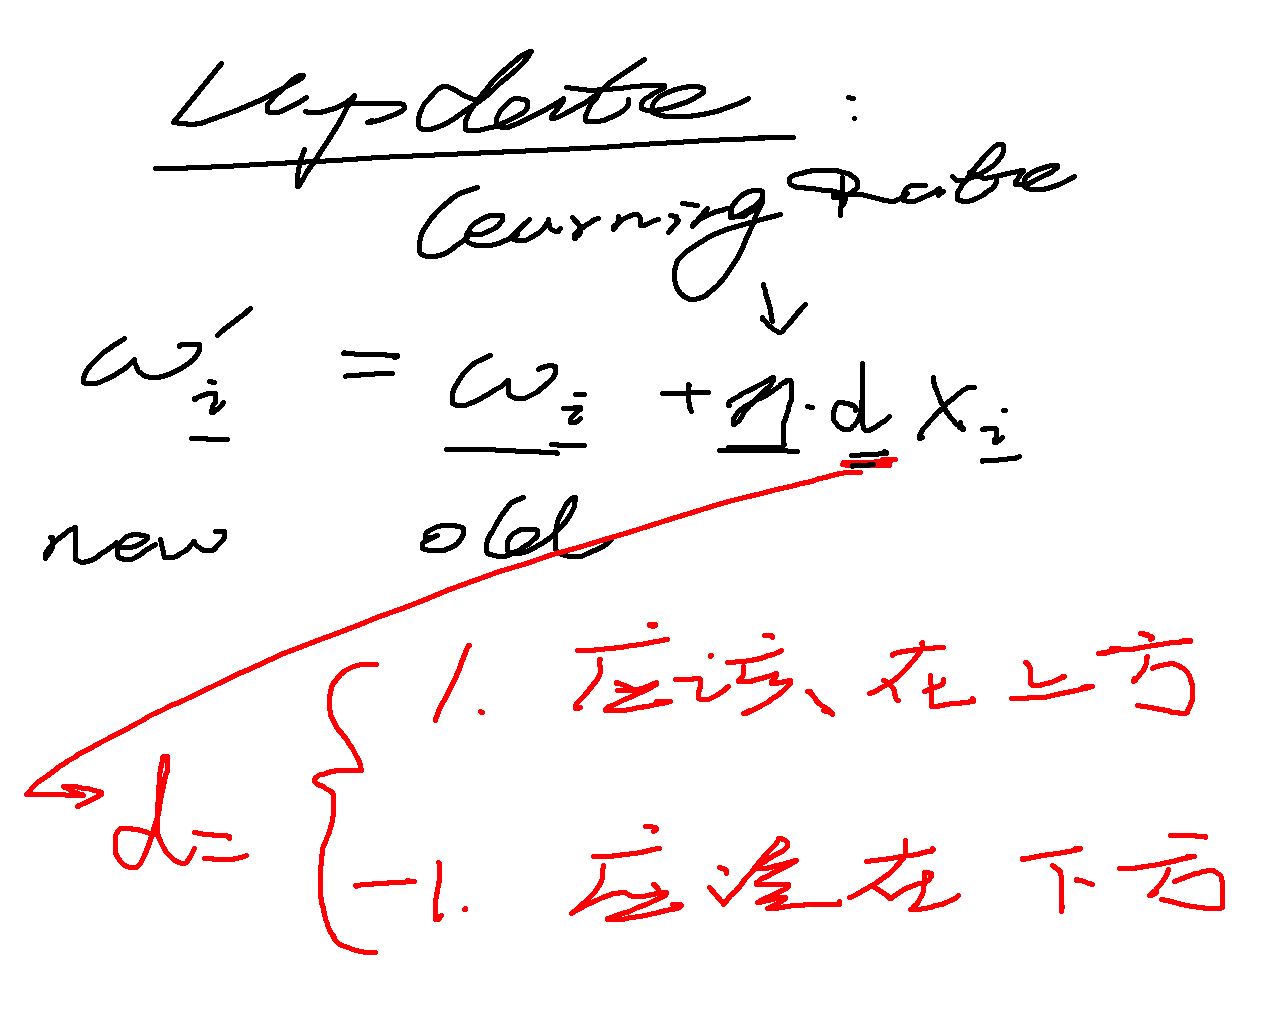

In [7]:
from IPython.display import Image
Image(filename='1.6.update2.png')

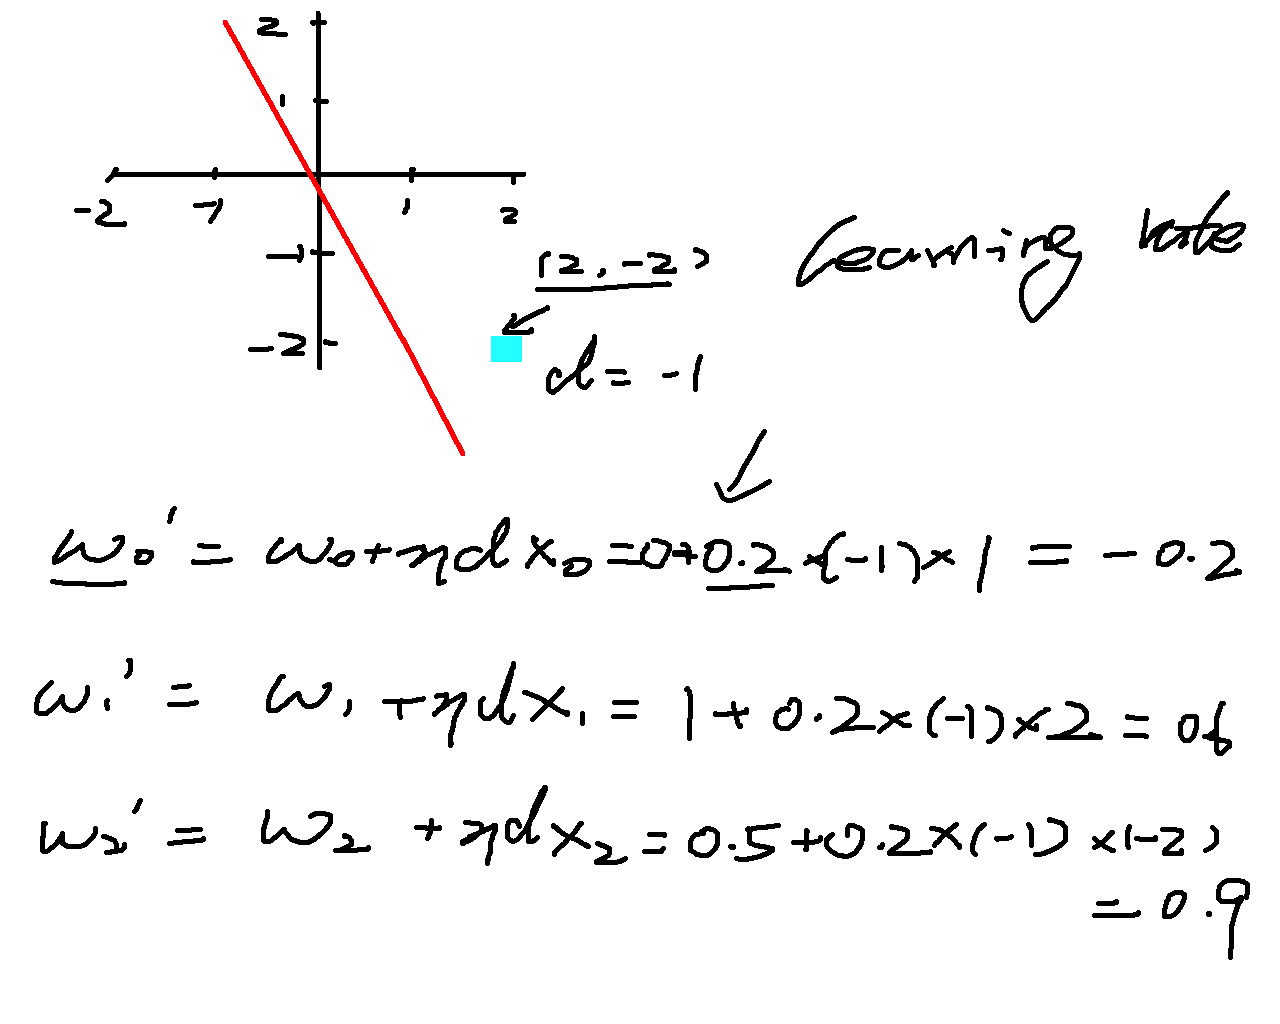

In [8]:
from IPython.display import Image
Image(filename='1.7.update3.png')



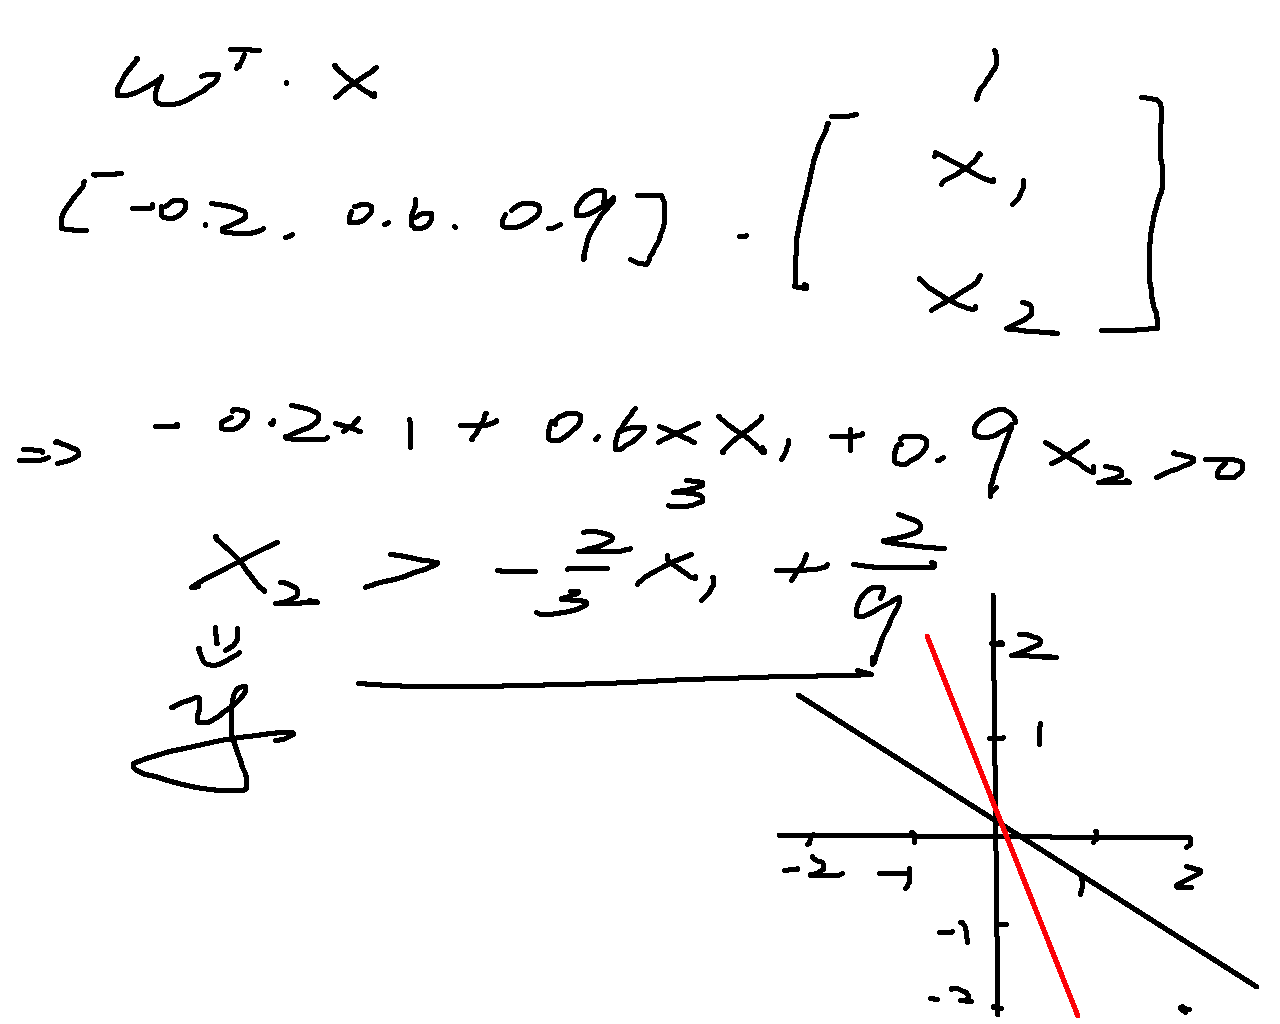

In [9]:
from IPython.display import Image
Image(filename='1.8.update4.png')



通过将笛卡尔坐标转换成极坐标（polar coordinates），实现如图情况的分类：

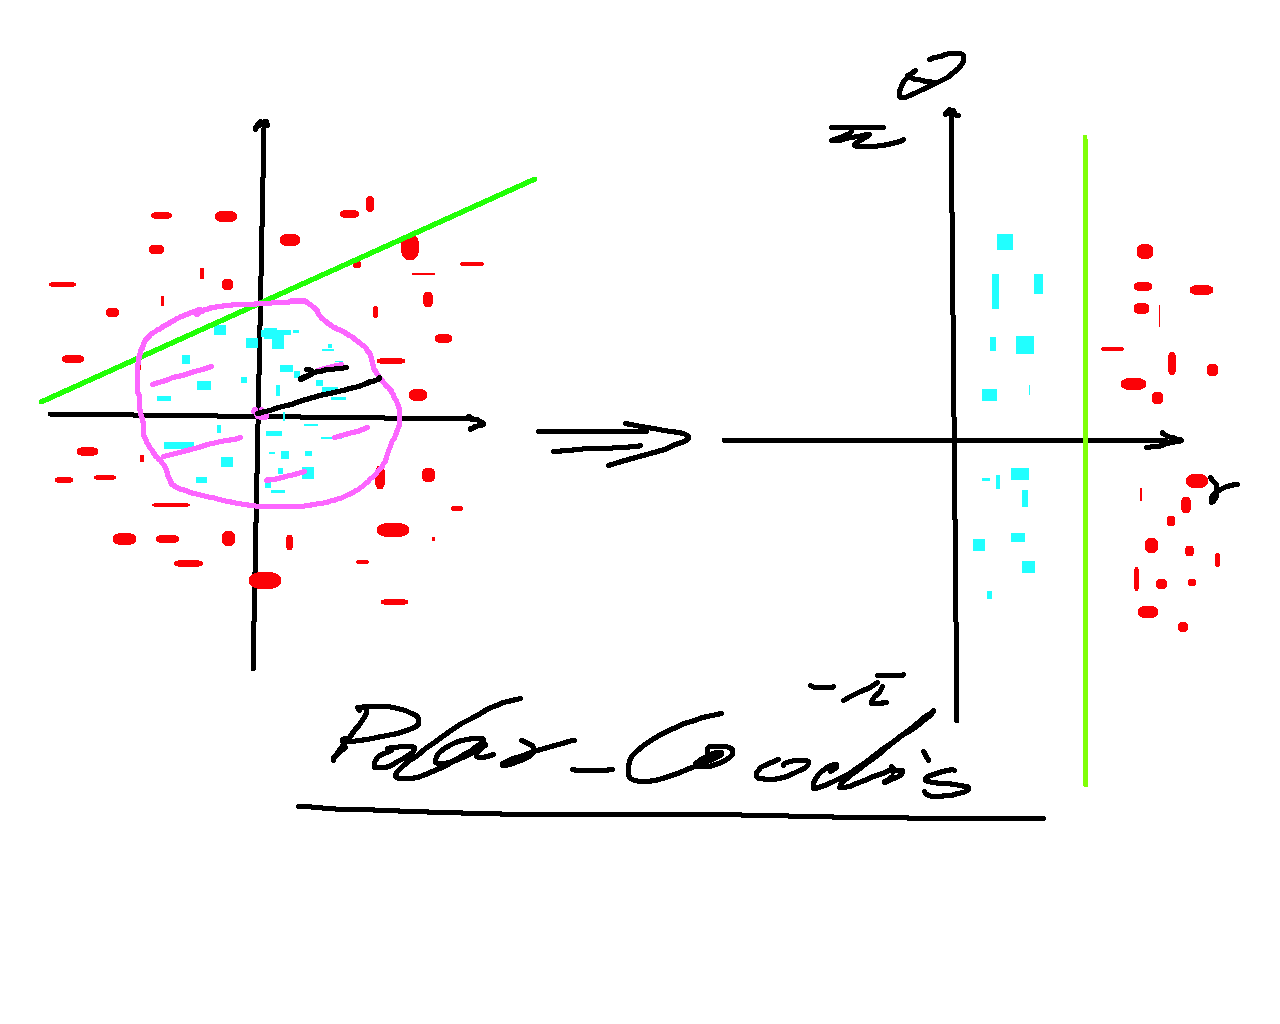

In [10]:
from IPython.display import Image
Image(filename='1.9.extra.png')

Perceptron Algo:

$$ activation = bias + \sum_{i=1}^{n} weight_{i} * x_{i}$$


prediction  = 1.0 if activation ≥ 0.0 else 0.0



using stochastic gradien descent(随机梯度下降)进行系数优化：


$$ w=w - learning\; rate*(predicted - expected)*x$$

In [2]:
def predict(row, weights):
	activation = weights[0]
	for i in range(len(row)-1):
		activation += weights[i + 1] * row[i]
	return 1.0 if activation >= 0.0 else 0.0


In [3]:
# 瞎写的一种二分数据
dataset = [[2.78,2.55,0],
           [1.47,2.36,0],
           [1.39,1.85,0],
           [3.06,3.01,0],
           [7.63,2.76,0],
           [5.33,2.09,1],
           [6.93,1.76,1],
           [8.76,-0.77,1],
           [7.66,2.46,1]]
# 瞎写的权重
# weights = [-0.1,0.20,-0.25]
weights = [2.0,0.569,-2.38]

# 竟然可以进行预测！
for row in dataset:
    prediction = predict(row,weights)
    print("Our Expected is : %d , Our Prediction is %d:" %(row[-1],prediction))


Our Expected is : 0 , Our Prediction is 0:
Our Expected is : 0 , Our Prediction is 0:
Our Expected is : 0 , Our Prediction is 0:
Our Expected is : 0 , Our Prediction is 0:
Our Expected is : 0 , Our Prediction is 0:
Our Expected is : 1 , Our Prediction is 1:
Our Expected is : 1 , Our Prediction is 1:
Our Expected is : 1 , Our Prediction is 1:
Our Expected is : 1 , Our Prediction is 1:


本质上我们会发现这个是一个线形模型（Linear Algorithms）

$$activation = (w_1 * X_1) + (w_2 * X_2) +bias  $$

$$activation = (0.20 * X_1) + (-0.25 * X_2) +(-0.1)  $$


learning rate:$w_i$的每次更新的程度<br>
epochs：更新的次数

loop:
1.每一个epoch需要循环
2.每一个epoch里面的每一行训练数据需要循环
3.每一个epoch里面的每一行数据的更新权重需要循环

w与bias的更新公式如下：


$$w(t+1) = w(t) - learning\;rate *(predicted(t) - expected(t))*x(t)$$
$$bias(t+1) = bias(t) - learning\;rate *(predicted(t) - expected(t))$$


In [ ]:
# def opt_weights(train,learning_rate,how_many_epoch):
#     weights = [0.0 for i in range(len(train[0]))]
#     for epoch in range(how_many_epoch):
#         sum_error = 0
#         for row in train:
#             prediction = predict(row,weights)
#             error = row[-1]- prediction
#             sum_error += error**2
#             weights[0] = weights[0] + learning_rate* error
#             for i in range(len(row)-1):
#                 weights[i+1] = weights[i+1] + learning_rate * error* row[i]
#         print('This is epoch: %d, our learning_rate is : %.4f, the error is : %.4f' % (epoch,learning_rate,sum_error))
#     return weights




In [ ]:
def output_weights(train, learning_rate, how_many_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(how_many_epoch):
        sum_error = 0
        for row in train:
            prediction = prediction(row, weights)
            error = prediction - row[i]
            sum_error += error ** 2
            weights[0] = weights[0] - learning_rate * error # 这是bias项
            for i in range(len(row)-1):
                weights[i+1] = weights[i+1] - learning_rate * error * row[i]
        print('This is epoch：%d, our learning_rate is : %.4f, the error is :%.4f'%(epoch, learning_rate, sum_error))
    return weights
